# CONNECTING TO IB API AND GETTING HISTORICAL DATA


In [1]:
%pip install ib_insync

In [5]:
# importing necessary libraries
from ib_insync import *
util.startLoop()

ib = IB()
ib.connect('127.0.0.1', 7497, clientId=1)

#To get a list of all exchanges that support market depth data and display the first 8:

l = ib.reqMktDepthExchanges()
l[:8]


[DepthMktDataDescription(exchange='DTB', secType='OPT', listingExch='', serviceDataType='Deep', aggGroup=2147483647),
 DepthMktDataDescription(exchange='COMEX', secType='FOP', listingExch='', serviceDataType='Deep', aggGroup=2147483647),
 DepthMktDataDescription(exchange='LSEETF', secType='STK', listingExch='', serviceDataType='Deep', aggGroup=2147483647),
 DepthMktDataDescription(exchange='SGX', secType='FUT', listingExch='', serviceDataType='Deep', aggGroup=2147483647),
 DepthMktDataDescription(exchange='IDEALPRO', secType='CASH', listingExch='', serviceDataType='Deep', aggGroup=4),
 DepthMktDataDescription(exchange='NASDAQ', secType='WAR', listingExch='', serviceDataType='Deep2', aggGroup=2147483647),
 DepthMktDataDescription(exchange='ARCA', secType='STK', listingExch='', serviceDataType='Deep', aggGroup=2147483647),
 DepthMktDataDescription(exchange='AEB', secType='IOPT', listingExch='', serviceDataType='Deep', aggGroup=2147483647)]

Get Historical data from Interactive brokers

In [6]:
contract = Stock('TSLA', 'SMART', 'USD')

ib.reqHeadTimeStamp(contract, whatToShow='TRADES', useRTH=True)

datetime.datetime(2010, 6, 29, 8, 0)

In [7]:
bars = ib.reqHistoricalData(
        contract,
        endDateTime='',
        durationStr='1 Y',
        barSizeSetting='1 hour',
        whatToShow='TRADES',
        useRTH=True,
        formatDate=1) 

In [58]:
bars[0]

BarData(date=datetime.datetime(2023, 3, 16, 9, 30, tzinfo=zoneinfo.ZoneInfo(key='US/Eastern')), open=180.27, high=182.48, low=178.84, close=182.2, volume=15069416.0, average=180.377, barCount=51590)

Convert the bars into rows and columns

In [8]:
df = util.df(bars)

display(df.head())
display(df.tail())

,date,open,high,low,close,volume,average,barCount
0,2023-03-16 09:30:00-04:00,180.27,182.48,178.84,182.20,15069416.0,180.377,51590
1,2023-03-16 10:00:00-04:00,182.24,182.40,179.52,181.95,20625099.0,180.902,72313
2,2023-03-16 11:00:00-04:00,181.98,185.42,180.88,185.04,19319995.0,183.182,67679
3,2023-03-16 12:00:00-04:00,185.06,185.36,183.58,185.35,13249236.0,184.474,46324
4,2023-03-16 13:00:00-04:00,185.34,185.81,183.72,184.42,10175634.0,184.856,36239


,date,open,high,low,close,volume,average,barCount
1746,2024-03-14 11:00:00-04:00,165.39,165.46,162.72,162.81,17284383.0,164.017,58241
1747,2024-03-14 12:00:00-04:00,162.82,163.75,161.88,162.88,12100210.0,162.762,38536
1748,2024-03-14 13:00:00-04:00,162.88,163.33,161.68,163.13,8164756.0,162.682,28460
1749,2024-03-14 14:00:00-04:00,163.16,163.54,160.84,160.96,9800673.0,162.114,34343
1750,2024-03-14 15:00:00-04:00,160.96,161.15,160.68,161.06,1778595.0,160.948,4885


Construct a time series graph from the historical data

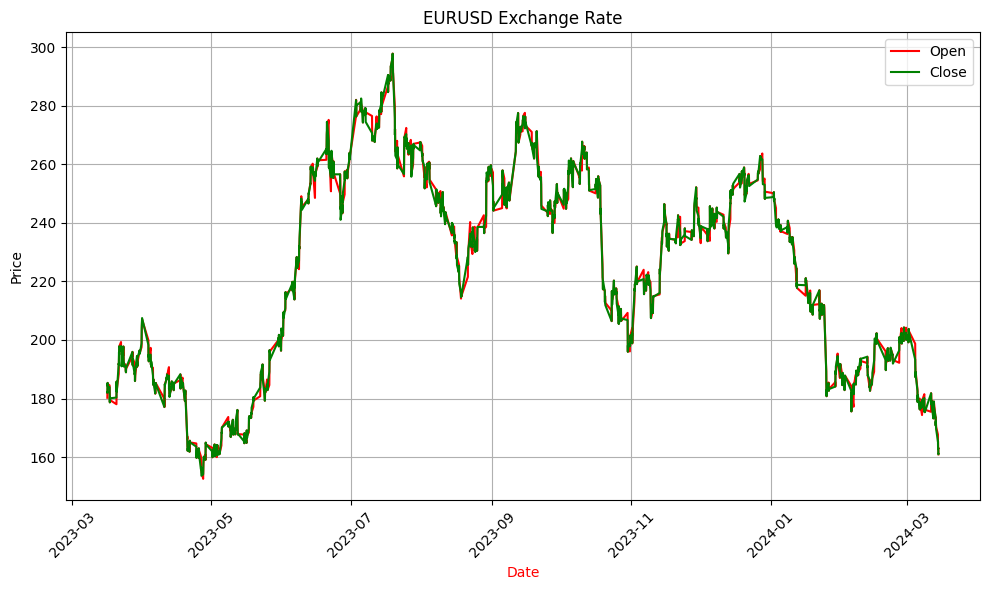

In [17]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['open'], label='Open', color='r')
plt.plot(df['date'], df['close'], label='Close', color='g')
plt.title('EURUSD Exchange Rate')
plt.xlabel('Date', color= 'r')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Let's subscribe to market depth data for EURUSD:

In [18]:
#Forex is a shortcut for specifying currency PAIRS symbol in this case EURUSD
contract = Forex('EURUSD')
ib.qualifyContracts(contract)
ticker = ib.reqMktDepth(contract)

Create a contract and a market order:

In [20]:
contract = Forex('EURUSD')
ib.qualifyContracts(contract)

order = LimitOrder('SELL', 20000, 1.11)

placeOrder will place the order order and return a ``Trade`` object right away (non-blocking):

In [21]:
trade = ib.placeOrder(contract, order)

Now let's create a limit order with an unrealistic limit:

In [22]:
limitOrder = LimitOrder('BUY', 20000, 0.05)
limitTrade = ib.placeOrder(contract, limitOrder)

limitTrade

Trade(contract=Forex('EURUSD', conId=12087792, exchange='IDEALPRO', localSymbol='EUR.USD', tradingClass='EUR.USD'), order=LimitOrder(orderId=42, clientId=1, action='BUY', totalQuantity=20000, lmtPrice=0.05), orderStatus=OrderStatus(orderId=42, status='PendingSubmit', filled=0.0, remaining=0.0, avgFillPrice=0.0, permId=0, parentId=0, lastFillPrice=0.0, clientId=0, whyHeld='', mktCapPrice=0.0), fills=[], log=[TradeLogEntry(time=datetime.datetime(2024, 3, 14, 19, 27, 0, 298545, tzinfo=datetime.timezone.utc), status='PendingSubmit', message='', errorCode=0)], advancedError='')

placeOrder is not blocking and will not wait on what happens with the order.
To make the order placement blocking, that is to wait until the order is either
filled or canceled, consider the following:

In [23]:
%%time
order = MarketOrder('BUY', 100)

trade = ib.placeOrder(contract, order)
while not trade.isDone():
    ib.waitOnUpdate()

CPU times: total: 0 ns
Wall time: 1.09 s


What are our positions?

In [76]:
ib.positions()

[Position(account='DU8948497', contract=Stock(conId=76792991, symbol='TSLA', exchange='NASDAQ', currency='USD', localSymbol='TSLA', tradingClass='NMS'), position=100.0, avgCost=161.94)]

What's the total of commissions paid today?

In [77]:
sum(fill.commissionReport.commission for fill in ib.fills())

1.0

whatIfOrder can be used to see the commission and the margin impact of an order without actually sending the order:

In [78]:
order = MarketOrder('SELL', 20000)
ib.whatIfOrder(contract, order)

OrderState(status='PreSubmitted', initMarginBefore='8961.7', maintMarginBefore='8147.0', equityWithLoanBefore='1000094.45', initMarginChange='1158340.48', maintMarginChange='964604.81', equityWithLoanChange='-17164.169999999925', initMarginAfter='1167302.18', maintMarginAfter='972751.81', equityWithLoanAfter='982930.28', commission=1.7976931348623157e+308, minCommission=1.7976931348623157e+308, maxCommission=1.7976931348623157e+308, commissionCurrency='', warningText='', completedTime='', completedStatus='')

In [ ]:
ib.disconnect()

GETTING THE FOREX DATA FROM IB FOR EUROS AND USD

              open     high     low   close  volume  average  barCount
date                                                                  
2005-03-09  1.3339  1.34230  1.3334  1.3393    -1.0     -1.0        -1
2005-03-10  1.3373  1.34560  1.3372  1.3419    -1.0     -1.0        -1
2005-03-11  1.3422  1.34785  1.3392  1.3458    -1.0     -1.0        -1
2005-03-14  1.3475  1.34770  1.3336  1.3370    -1.0     -1.0        -1
2005-03-15  1.3358  1.34110  1.3297  1.3305    -1.0     -1.0        -1


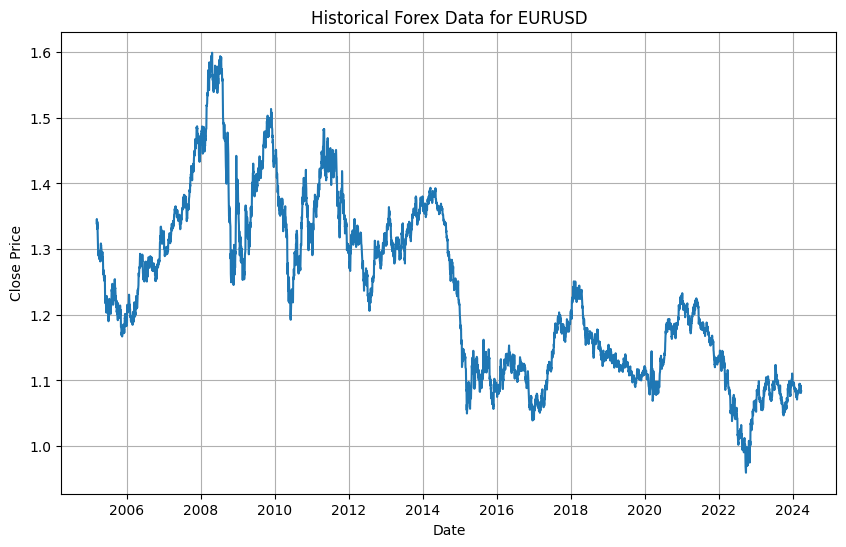

In [1]:
from ib_insync import *
import pandas as pd
import datetime
# Plotting the data
import matplotlib.pyplot as plt

# Connect to IB Gateway or TWS. 
util.startLoop()
ib = IB()
ib.connect('127.0.0.1', 7497, clientId=1000) 

# Define the forex contract
contract = Forex('EURUSD')  #forex pair

# Request historical data
bars = ib.reqHistoricalData(
    contract,
    endDateTime='',
    durationStr='20 Y',  #The duration as expected this can be adjusted
    barSizeSetting='1 day',  #bar size as needed but can change accordingly 
    whatToShow='MIDPOINT',
    useRTH=True,
    formatDate=1
)

# Convert data to pandas DataFrame
df = util.df(bars)
df.set_index('date', inplace=True)

# Disconnect from IB
ib.disconnect()

# Print the historical data
print(df.head())

plt.figure(figsize=(10, 6))
plt.plot(df.index, df.close)
plt.title('Historical Forex Data for EURUSD')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()


In [ ]:
from ib_insync import *
import pandas as pd
import datetime
import matplotlib.pyplot as plt

# Connect to IB Gateway or TWS.
util.startLoop()
ib = IB()
ib.connect('127.0.0.1', 7497, clientId=1000)

# Define the forex contract
contract = Forex('EURUSD')

# Request historical data
bars = ib.reqHistoricalData(
    contract,
    endDateTime='',
    durationStr='20 Y',
    barSizeSetting='1 day',
    whatToShow='MIDPOINT',
    useRTH=True,
    formatDate=1
)

# Convert data to pandas DataFrame
df = util.df(bars)
df.set_index('date', inplace=True)

# Save data to CSV
df.to_csv('historical_forex_data30.csv')

# Disconnect from IB
ib.disconnect()

# Print the historical data
print(df.head())

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df.close)
plt.title('Historical Forex Data for EURUSD')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()
